In [ ]:
import soundfile
import glob
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation, BatchNormalization, Input
from tensorflow.keras.layers import LSTM, Conv2D, Resizing
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import TimeDistributed, MaxPooling1D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt

# Load data and preprocess

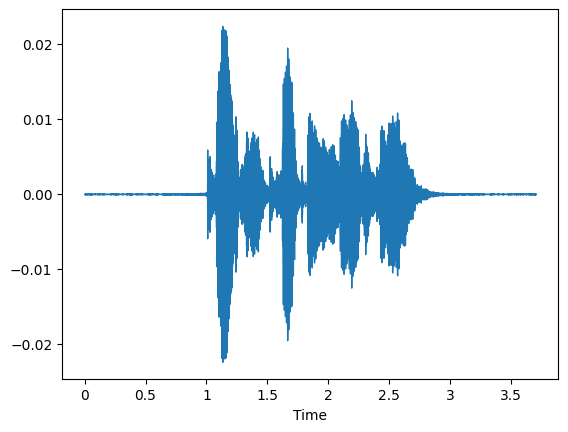

In [ ]:
n_fft = 2048
hop_length = 512
n_mels=128
filename = 'ravdess/Actor_01/03-01-02-02-01-01-01.wav'
y, sr = librosa.load(filename)
audio, _ = librosa.effects.trim(y)
librosa.display.waveshow(audio, sr=sr);

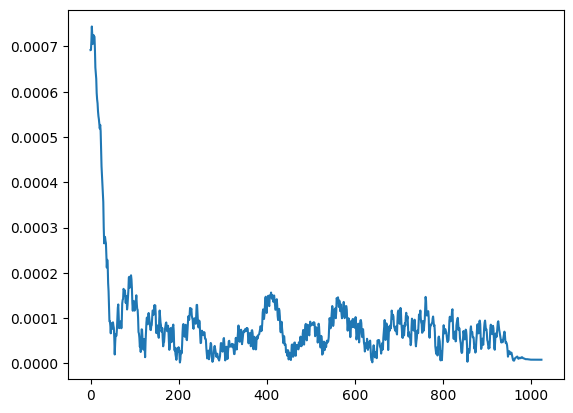

In [ ]:
n_fft = 2048
D = np.abs(librosa.stft(audio[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

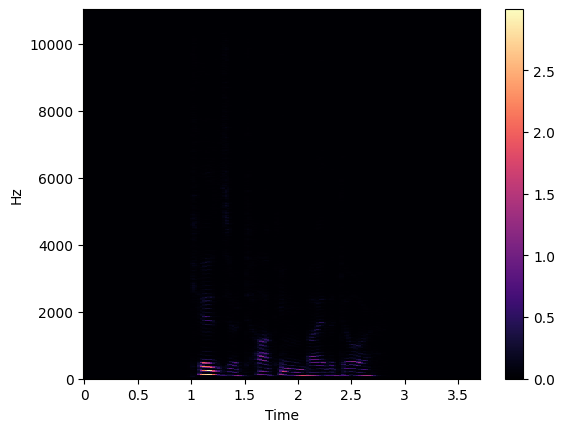

In [ ]:
hop_length = 512
D = np.abs(librosa.stft(audio, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

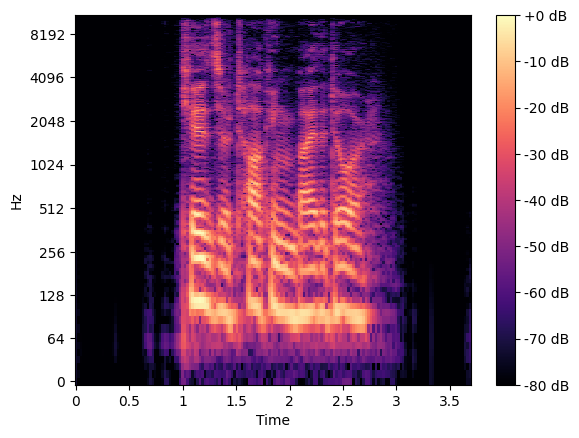

In [ ]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [ ]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
    return result

In [ ]:
# all emotions
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

#used emotions
AVAILABLE_EMOTIONS = {
    "neutral",
    "happy",
    "sad",
    "angry",
}

used_emotions = ["neutral", "happy", "sad", "angry"]

# Models

In [ ]:
#change of function to fit the rest of the models
EMOTIONS = []
def load_data(test_size=0.2):
    X, y = [], []
    for file in glob.glob("data/Actor_*/*.wav"):
        basename = os.path.basename(file)
        emotion_int = int(basename.split("-")[2])
        emotion = int2emotion[basename.split("-")[2]]
        if emotion in AVAILABLE_EMOTIONS:
            EMOTIONS.append(emotion)
            features = extract_feature(file, mfcc=True, chroma=True, mel=True)
            X.append(features)
            y.append(emotion_int)
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [ ]:
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,a

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-6.7138672e-04 -7.0190430e-04 -6.1035156e-04 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ... -3.6926270e-03
 -7.4768066e-03 -8.6975098e-03] as keyword args. From version 0.10 passing these as positional arguments will result in

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[0.00054932 0.00057983 0.00057983 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(libro

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 3.0517578e-05 -2.4414062e-04 -3.9672852e-04 ...  3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-05  3.0517578e-05 ...  1.0681152e-03
  1.0681152e-03  1.0681152e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an er

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ... -8.5449219e-04
 -6.4086914e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -2.4414062e-04
 -2.1667480e-03 -2.4414062e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  6.1035156e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-2.7465820e-04  1.8310547e-04 -6.1035156e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = 

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00152588 -0.00149536
 -0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[0.         0.         0.         ... 0.00283813 0.0027771  0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.m

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  1.3732910e-03
  1.4038086e-03  1.4343262e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 9.1552734e-05  3.0517578e-05  1.2207031e-04 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-3.3569336e-04 -9.1552734e-05  3.9672852e-04 ...  1.5258789e-04
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 1.8310547e-04  1.8310547e-04  6.1035156e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.5258789e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an er

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00125122 -0.00125122
 -0.00125122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[-0.0022583  -0.00228882 -0.00234985 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.me

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

print(x_traincnn.shape, x_testcnn.shape)

(504, 180, 1) (168, 180, 1)


In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# LSTM

# 3 Conv

In [ ]:
model = Sequential()
model.add(Conv1D(64, 5, padding='same', input_shape=(180,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dropout(0.5))  #0.2
model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=['accuracy'],
)
history3 = model.fit(x_traincnn, np.array(y_train_cat),
          batch_size=30,
          epochs=1000,
          validation_data=(x_testcnn, np.array(y_test_cat)))

Epoch 1/1000
17/17 [==============================] - 2s 32ms/step - loss: 4.0705 - accuracy: 0.2401 - val_loss: 1.3850 - val_accuracy: 0.2917
Epoch 2/1000
17/17 [==============================] - 0s 18ms/step - loss: 3.0237 - accuracy: 0.2599 - val_loss: 1.4736 - val_accuracy: 0.3095
Epoch 3/1000
17/17 [==============================] - 0s 18ms/step - loss: 2.2756 - accuracy: 0.3413 - val_loss: 1.2003 - val_accuracy: 0.4464
Epoch 4/1000
17/17 [==============================] - 0s 17ms/step - loss: 2.0169 - accuracy: 0.3373 - val_loss: 1.2282 - val_accuracy: 0.4167
Epoch 5/1000
17/17 [==============================] - 0s 19ms/step - loss: 1.8782 - accuracy: 0.3532 - val_loss: 1.1935 - val_accuracy: 0.4643
Epoch 6/1000
17/17 [==============================] - 0s 17ms/step - loss: 1.6503 - accuracy: 0.3313 - val_loss: 1.1691 - val_accuracy: 0.4643
Epoch 7/1000
17/17 [==============================] - 0s 16ms/step - loss: 1.4979 - accuracy: 0.3889 - val_loss: 1.1438 - val_accuracy: 0.5000

Epoch 58/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.8942 - accuracy: 0.6190 - val_loss: 0.8642 - val_accuracy: 0.6786
Epoch 59/1000
17/17 [==============================] - 0s 23ms/step - loss: 0.9006 - accuracy: 0.6012 - val_loss: 0.8599 - val_accuracy: 0.6310
Epoch 60/1000
17/17 [==============================] - 0s 20ms/step - loss: 0.8927 - accuracy: 0.5933 - val_loss: 0.8548 - val_accuracy: 0.6667
Epoch 61/1000
17/17 [==============================] - 0s 20ms/step - loss: 0.8681 - accuracy: 0.6091 - val_loss: 0.8965 - val_accuracy: 0.6071
Epoch 62/1000
17/17 [==============================] - 0s 20ms/step - loss: 0.8675 - accuracy: 0.6270 - val_loss: 0.8589 - val_accuracy: 0.6905
Epoch 63/1000
17/17 [==============================] - 0s 23ms/step - loss: 0.8822 - accuracy: 0.6250 - val_loss: 0.8534 - val_accuracy: 0.6131
Epoch 64/1000
17/17 [==============================] - 0s 25ms/step - loss: 0.8732 - accuracy: 0.6210 - val_loss: 0.8806 - val_accuracy:

Epoch 115/1000
17/17 [==============================] - 0s 24ms/step - loss: 0.7322 - accuracy: 0.7024 - val_loss: 0.6948 - val_accuracy: 0.7321
Epoch 116/1000
17/17 [==============================] - 0s 21ms/step - loss: 0.7000 - accuracy: 0.7063 - val_loss: 0.6904 - val_accuracy: 0.7262
Epoch 117/1000
17/17 [==============================] - 0s 21ms/step - loss: 0.7132 - accuracy: 0.7242 - val_loss: 0.7109 - val_accuracy: 0.7143
Epoch 118/1000
17/17 [==============================] - 0s 21ms/step - loss: 0.6802 - accuracy: 0.7183 - val_loss: 0.6879 - val_accuracy: 0.7321
Epoch 119/1000
17/17 [==============================] - 0s 21ms/step - loss: 0.6885 - accuracy: 0.7361 - val_loss: 0.6983 - val_accuracy: 0.7321
Epoch 120/1000
17/17 [==============================] - 0s 20ms/step - loss: 0.7180 - accuracy: 0.7143 - val_loss: 0.6959 - val_accuracy: 0.7321
Epoch 121/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.7105 - accuracy: 0.6925 - val_loss: 0.7136 - val_ac

17/17 [==============================] - 0s 18ms/step - loss: 0.5489 - accuracy: 0.7857 - val_loss: 0.6009 - val_accuracy: 0.7738
Epoch 172/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.5682 - accuracy: 0.7659 - val_loss: 0.5989 - val_accuracy: 0.7738
Epoch 173/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.5415 - accuracy: 0.8075 - val_loss: 0.5862 - val_accuracy: 0.7619
Epoch 174/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.5561 - accuracy: 0.7758 - val_loss: 0.6027 - val_accuracy: 0.7381
Epoch 175/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.5405 - accuracy: 0.7956 - val_loss: 0.6182 - val_accuracy: 0.7262
Epoch 176/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.5592 - accuracy: 0.7599 - val_loss: 0.5910 - val_accuracy: 0.7500
Epoch 177/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.5638 - accuracy: 0.7718 - val_loss: 0.6017 - val_accuracy: 0.7500


17/17 [==============================] - 0s 21ms/step - loss: 0.4536 - accuracy: 0.8075 - val_loss: 0.5388 - val_accuracy: 0.7857
Epoch 228/1000
17/17 [==============================] - 0s 19ms/step - loss: 0.4684 - accuracy: 0.8175 - val_loss: 0.5242 - val_accuracy: 0.7798
Epoch 229/1000
17/17 [==============================] - 0s 29ms/step - loss: 0.4692 - accuracy: 0.8194 - val_loss: 0.5216 - val_accuracy: 0.7857
Epoch 230/1000
17/17 [==============================] - 0s 23ms/step - loss: 0.4837 - accuracy: 0.8115 - val_loss: 0.5530 - val_accuracy: 0.7738
Epoch 231/1000
17/17 [==============================] - 0s 20ms/step - loss: 0.4709 - accuracy: 0.8254 - val_loss: 0.5132 - val_accuracy: 0.7738
Epoch 232/1000
17/17 [==============================] - 0s 20ms/step - loss: 0.4691 - accuracy: 0.8194 - val_loss: 0.5235 - val_accuracy: 0.7857
Epoch 233/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.4293 - accuracy: 0.8333 - val_loss: 0.5009 - val_accuracy: 0.7798


17/17 [==============================] - 0s 17ms/step - loss: 0.3514 - accuracy: 0.8810 - val_loss: 0.4701 - val_accuracy: 0.8155
Epoch 284/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.3594 - accuracy: 0.8710 - val_loss: 0.4716 - val_accuracy: 0.7917
Epoch 285/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.3544 - accuracy: 0.8849 - val_loss: 0.4808 - val_accuracy: 0.7917
Epoch 286/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.3396 - accuracy: 0.8909 - val_loss: 0.4629 - val_accuracy: 0.7917
Epoch 287/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.3589 - accuracy: 0.8869 - val_loss: 0.5484 - val_accuracy: 0.7619
Epoch 288/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.3515 - accuracy: 0.8829 - val_loss: 0.4603 - val_accuracy: 0.7917
Epoch 289/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.3347 - accuracy: 0.8829 - val_loss: 0.4839 - val_accuracy: 0.8214


17/17 [==============================] - 0s 18ms/step - loss: 0.2657 - accuracy: 0.9127 - val_loss: 0.4691 - val_accuracy: 0.7857
Epoch 340/1000
17/17 [==============================] - 0s 19ms/step - loss: 0.2835 - accuracy: 0.9028 - val_loss: 0.4174 - val_accuracy: 0.8095
Epoch 341/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.2921 - accuracy: 0.8929 - val_loss: 0.4144 - val_accuracy: 0.8036
Epoch 342/1000
17/17 [==============================] - 0s 19ms/step - loss: 0.2665 - accuracy: 0.9167 - val_loss: 0.4106 - val_accuracy: 0.8214
Epoch 343/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.2430 - accuracy: 0.9286 - val_loss: 0.4068 - val_accuracy: 0.8214
Epoch 344/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.2645 - accuracy: 0.9147 - val_loss: 0.4239 - val_accuracy: 0.8274
Epoch 345/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.2520 - accuracy: 0.9107 - val_loss: 0.4014 - val_accuracy: 0.8333


17/17 [==============================] - 0s 18ms/step - loss: 0.1926 - accuracy: 0.9524 - val_loss: 0.3983 - val_accuracy: 0.8512
Epoch 396/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.2291 - accuracy: 0.9306 - val_loss: 0.4137 - val_accuracy: 0.8274
Epoch 397/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.2012 - accuracy: 0.9385 - val_loss: 0.4203 - val_accuracy: 0.8333
Epoch 398/1000
17/17 [==============================] - 0s 19ms/step - loss: 0.2128 - accuracy: 0.9365 - val_loss: 0.4002 - val_accuracy: 0.8631
Epoch 399/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.1862 - accuracy: 0.9405 - val_loss: 0.4013 - val_accuracy: 0.8155
Epoch 400/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.1980 - accuracy: 0.9444 - val_loss: 0.3851 - val_accuracy: 0.8512
Epoch 401/1000
17/17 [==============================] - 0s 19ms/step - loss: 0.1905 - accuracy: 0.9484 - val_loss: 0.3794 - val_accuracy: 0.8214


17/17 [==============================] - 0s 17ms/step - loss: 0.1655 - accuracy: 0.9504 - val_loss: 0.4131 - val_accuracy: 0.8512
Epoch 452/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1651 - accuracy: 0.9425 - val_loss: 0.3481 - val_accuracy: 0.8750
Epoch 453/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1490 - accuracy: 0.9663 - val_loss: 0.3623 - val_accuracy: 0.8631
Epoch 454/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1450 - accuracy: 0.9484 - val_loss: 0.3716 - val_accuracy: 0.8274
Epoch 455/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1362 - accuracy: 0.9702 - val_loss: 0.3932 - val_accuracy: 0.8452
Epoch 456/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1371 - accuracy: 0.9603 - val_loss: 0.3950 - val_accuracy: 0.8393
Epoch 457/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1438 - accuracy: 0.9663 - val_loss: 0.3993 - val_accuracy: 0.8452


17/17 [==============================] - 0s 16ms/step - loss: 0.1244 - accuracy: 0.9603 - val_loss: 0.3419 - val_accuracy: 0.8571
Epoch 508/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.1163 - accuracy: 0.9663 - val_loss: 0.3800 - val_accuracy: 0.8571
Epoch 509/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1084 - accuracy: 0.9762 - val_loss: 0.3215 - val_accuracy: 0.8690
Epoch 510/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.1500 - accuracy: 0.9544 - val_loss: 0.3257 - val_accuracy: 0.8571
Epoch 511/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1270 - accuracy: 0.9683 - val_loss: 0.3411 - val_accuracy: 0.8631
Epoch 512/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.1256 - accuracy: 0.9663 - val_loss: 0.3484 - val_accuracy: 0.8631
Epoch 513/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1177 - accuracy: 0.9802 - val_loss: 0.3428 - val_accuracy: 0.8631


17/17 [==============================] - 0s 16ms/step - loss: 0.0829 - accuracy: 0.9742 - val_loss: 0.3165 - val_accuracy: 0.8750
Epoch 564/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0953 - accuracy: 0.9782 - val_loss: 0.3254 - val_accuracy: 0.8750
Epoch 565/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0792 - accuracy: 0.9881 - val_loss: 0.3465 - val_accuracy: 0.8690
Epoch 566/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1391 - accuracy: 0.9504 - val_loss: 0.4035 - val_accuracy: 0.8512
Epoch 567/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0895 - accuracy: 0.9782 - val_loss: 0.3869 - val_accuracy: 0.8631
Epoch 568/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0859 - accuracy: 0.9802 - val_loss: 0.3600 - val_accuracy: 0.8571
Epoch 569/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.1008 - accuracy: 0.9722 - val_loss: 0.3623 - val_accuracy: 0.8690


17/17 [==============================] - 0s 16ms/step - loss: 0.0688 - accuracy: 0.9881 - val_loss: 0.3657 - val_accuracy: 0.8750
Epoch 620/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0716 - accuracy: 0.9802 - val_loss: 0.3563 - val_accuracy: 0.8631
Epoch 621/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0654 - accuracy: 0.9821 - val_loss: 0.3649 - val_accuracy: 0.8750
Epoch 622/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0673 - accuracy: 0.9802 - val_loss: 0.3918 - val_accuracy: 0.8571
Epoch 623/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0626 - accuracy: 0.9901 - val_loss: 0.3547 - val_accuracy: 0.8750
Epoch 624/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0665 - accuracy: 0.9841 - val_loss: 0.3850 - val_accuracy: 0.8571
Epoch 625/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0739 - accuracy: 0.9841 - val_loss: 0.3351 - val_accuracy: 0.8810


17/17 [==============================] - 0s 17ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.3714 - val_accuracy: 0.8571
Epoch 676/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.0500 - accuracy: 0.9881 - val_loss: 0.3582 - val_accuracy: 0.8810
Epoch 677/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0530 - accuracy: 0.9881 - val_loss: 0.4068 - val_accuracy: 0.8571
Epoch 678/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0590 - accuracy: 0.9802 - val_loss: 0.3553 - val_accuracy: 0.8869
Epoch 679/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0535 - accuracy: 0.9901 - val_loss: 0.3522 - val_accuracy: 0.8571
Epoch 680/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0507 - accuracy: 0.9861 - val_loss: 0.3470 - val_accuracy: 0.8810
Epoch 681/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.0537 - accuracy: 0.9921 - val_loss: 0.3597 - val_accuracy: 0.8750


17/17 [==============================] - 0s 17ms/step - loss: 0.0484 - accuracy: 0.9881 - val_loss: 0.3288 - val_accuracy: 0.8869
Epoch 732/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.9921 - val_loss: 0.3246 - val_accuracy: 0.9048
Epoch 733/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.9960 - val_loss: 0.3130 - val_accuracy: 0.9107
Epoch 734/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0276 - accuracy: 0.9960 - val_loss: 0.3773 - val_accuracy: 0.8631
Epoch 735/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0385 - accuracy: 0.9901 - val_loss: 0.3502 - val_accuracy: 0.8869
Epoch 736/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0494 - accuracy: 0.9881 - val_loss: 0.3577 - val_accuracy: 0.8690
Epoch 737/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0517 - accuracy: 0.9881 - val_loss: 0.3225 - val_accuracy: 0.8929


17/17 [==============================] - 0s 18ms/step - loss: 0.0247 - accuracy: 0.9940 - val_loss: 0.3534 - val_accuracy: 0.8750
Epoch 788/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.0418 - accuracy: 0.9881 - val_loss: 0.3454 - val_accuracy: 0.8929
Epoch 789/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0308 - accuracy: 0.9940 - val_loss: 0.3845 - val_accuracy: 0.8750
Epoch 790/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.0258 - accuracy: 0.9960 - val_loss: 0.3772 - val_accuracy: 0.8869
Epoch 791/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.0477 - accuracy: 0.9821 - val_loss: 0.4340 - val_accuracy: 0.8571
Epoch 792/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0342 - accuracy: 0.9901 - val_loss: 0.3445 - val_accuracy: 0.8988
Epoch 793/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0351 - accuracy: 0.9901 - val_loss: 0.3631 - val_accuracy: 0.8810


17/17 [==============================] - 0s 18ms/step - loss: 0.0291 - accuracy: 0.9921 - val_loss: 0.4005 - val_accuracy: 0.8690
Epoch 844/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0192 - accuracy: 0.9980 - val_loss: 0.3958 - val_accuracy: 0.8810
Epoch 845/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0233 - accuracy: 0.9940 - val_loss: 0.3853 - val_accuracy: 0.8810
Epoch 846/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0382 - accuracy: 0.9901 - val_loss: 0.3411 - val_accuracy: 0.9107
Epoch 847/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0246 - accuracy: 0.9940 - val_loss: 0.4268 - val_accuracy: 0.8631
Epoch 848/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0196 - accuracy: 0.9980 - val_loss: 0.3281 - val_accuracy: 0.8810
Epoch 849/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0285 - accuracy: 0.9921 - val_loss: 0.3763 - val_accuracy: 0.8869


17/17 [==============================] - 0s 17ms/step - loss: 0.0211 - accuracy: 0.9980 - val_loss: 0.3621 - val_accuracy: 0.8929
Epoch 900/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0284 - accuracy: 0.9921 - val_loss: 0.3707 - val_accuracy: 0.8929
Epoch 901/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.3706 - val_accuracy: 0.8929
Epoch 902/1000
17/17 [==============================] - 0s 18ms/step - loss: 0.0277 - accuracy: 0.9921 - val_loss: 0.3992 - val_accuracy: 0.8810
Epoch 903/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 0.3827 - val_accuracy: 0.8810
Epoch 904/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0197 - accuracy: 0.9980 - val_loss: 0.3814 - val_accuracy: 0.8988
Epoch 905/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.3809 - val_accuracy: 0.8869


17/17 [==============================] - 0s 16ms/step - loss: 0.0257 - accuracy: 0.9940 - val_loss: 0.3584 - val_accuracy: 0.8810
Epoch 956/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0262 - accuracy: 0.9881 - val_loss: 0.3841 - val_accuracy: 0.8810
Epoch 957/1000
17/17 [==============================] - 0s 17ms/step - loss: 0.0141 - accuracy: 0.9980 - val_loss: 0.3642 - val_accuracy: 0.8929
Epoch 958/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0236 - accuracy: 0.9940 - val_loss: 0.5128 - val_accuracy: 0.8631
Epoch 959/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0207 - accuracy: 0.9960 - val_loss: 0.3815 - val_accuracy: 0.8869
Epoch 960/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0173 - accuracy: 0.9960 - val_loss: 0.3867 - val_accuracy: 0.8750
Epoch 961/1000
17/17 [==============================] - 0s 16ms/step - loss: 0.0178 - accuracy: 0.9960 - val_loss: 0.3736 - val_accuracy: 0.8929


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 180, 64)           384       
                                                                 
 activation (Activation)     (None, 180, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 64)            20544     
                                                                 
 activation_1 (Activation)   (None, 90, 64)            0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 45, 64)           0         
 1D)                                                    

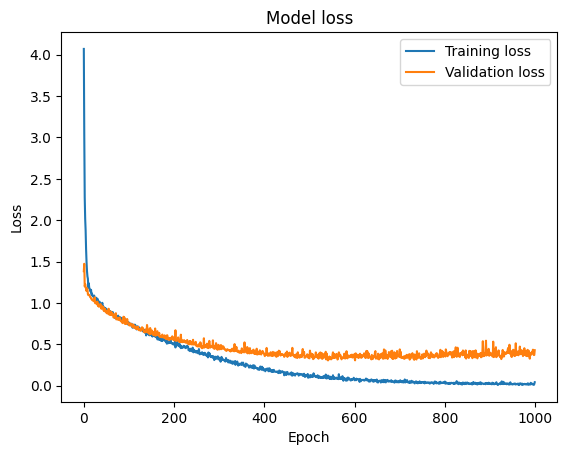

In [ ]:
plt.plot(history3.history['loss'], label="Training loss")
plt.plot(history3.history['val_loss'], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model loss")
plt.legend(loc="upper right")
plt.show()

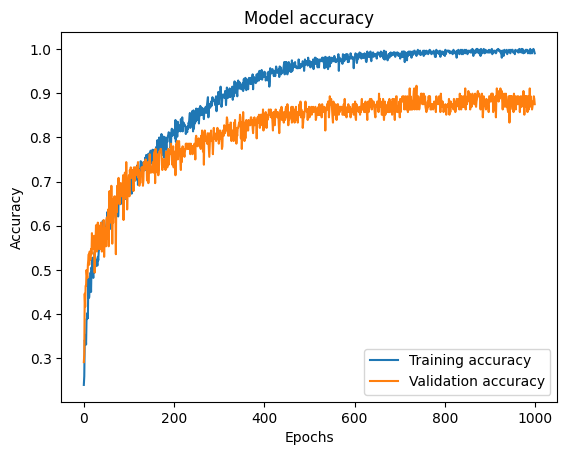

In [ ]:
plt.plot(history3.history['accuracy'], label="Training accuracy")
plt.plot(history3.history['val_accuracy'], label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model accuracy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
min_val_loss = min(history3.history['val_loss'])
min_val_loss

0.30562958121299744

In [ ]:
max_val_acc = max(history3.history['val_accuracy'])
max_val_acc

0.9166666865348816

In [ ]:
model.save('Emotion_Voice_Detection_Model_with_selected_emotions.h5')

In [ ]:
from keras.models import load_model
loaded_model = load_model("Emotion_Voice_Detection_Model_with_selected_emotions.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
all_emotions = ["notused", "neutral", "notused", "happy", "sad", "angry"]

In [ ]:
filename = 'YAF_voice_happy.wav'
y, sr = librosa.load(filename)
audio, _ = librosa.effects.trim(y)

In [ ]:
sample_features = extract_feature(filename, mfcc=True, chroma=True, mel=True)

C:\Users\lenovoo\AppData\Local\Temp\ipykernel_24532\2979685869.py:18: FutureWarning: Pass y=[ 0.0000000e+00 -3.6621094e-04 -2.4414062e-04 ... -9.1552734e-05
 -1.2207031e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [ ]:
q = loaded_model.predict(np.array([sample_features]))[0]

1/1 [==============================] - 0s 110ms/step


In [ ]:
max_acc = max(q)

In [ ]:
ind = np.where(q == max_acc)[0][0]
ind

3

In [ ]:
all_emotions[ind]

'happy'

In [ ]:
#Predict
y_prediction = model.predict(x_testcnn)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test_cat, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

6/6 [==============================] - 0s 5ms/step
[[0.88235294 0.05882353 0.04761905 0.01724138]
 [0.         0.74509804 0.02380952 0.03448276]
 [0.11764706 0.07843137 0.92857143 0.        ]
 [0.         0.11764706 0.         0.94827586]]


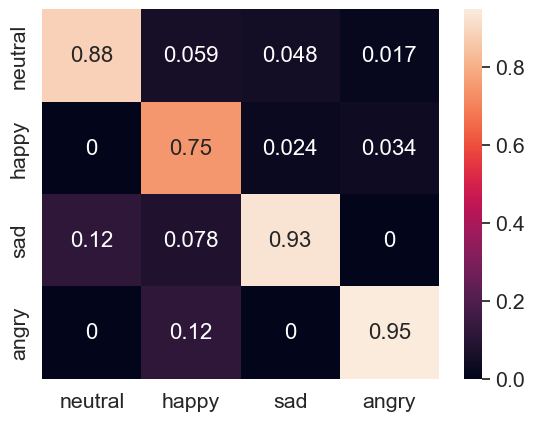

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(result, range(len(used_emotions)), range(len(used_emotions)))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=used_emotions, yticklabels=used_emotions) # font size

plt.show()